In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hr_attrition.csv")

In [3]:
df

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [4]:
original = df.copy()

## DATA CLEANSING and DATA VISUALIZATION

In [5]:
df.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
duplicate = df[df.duplicated()]
duplicate

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## DATA VISUALISATION

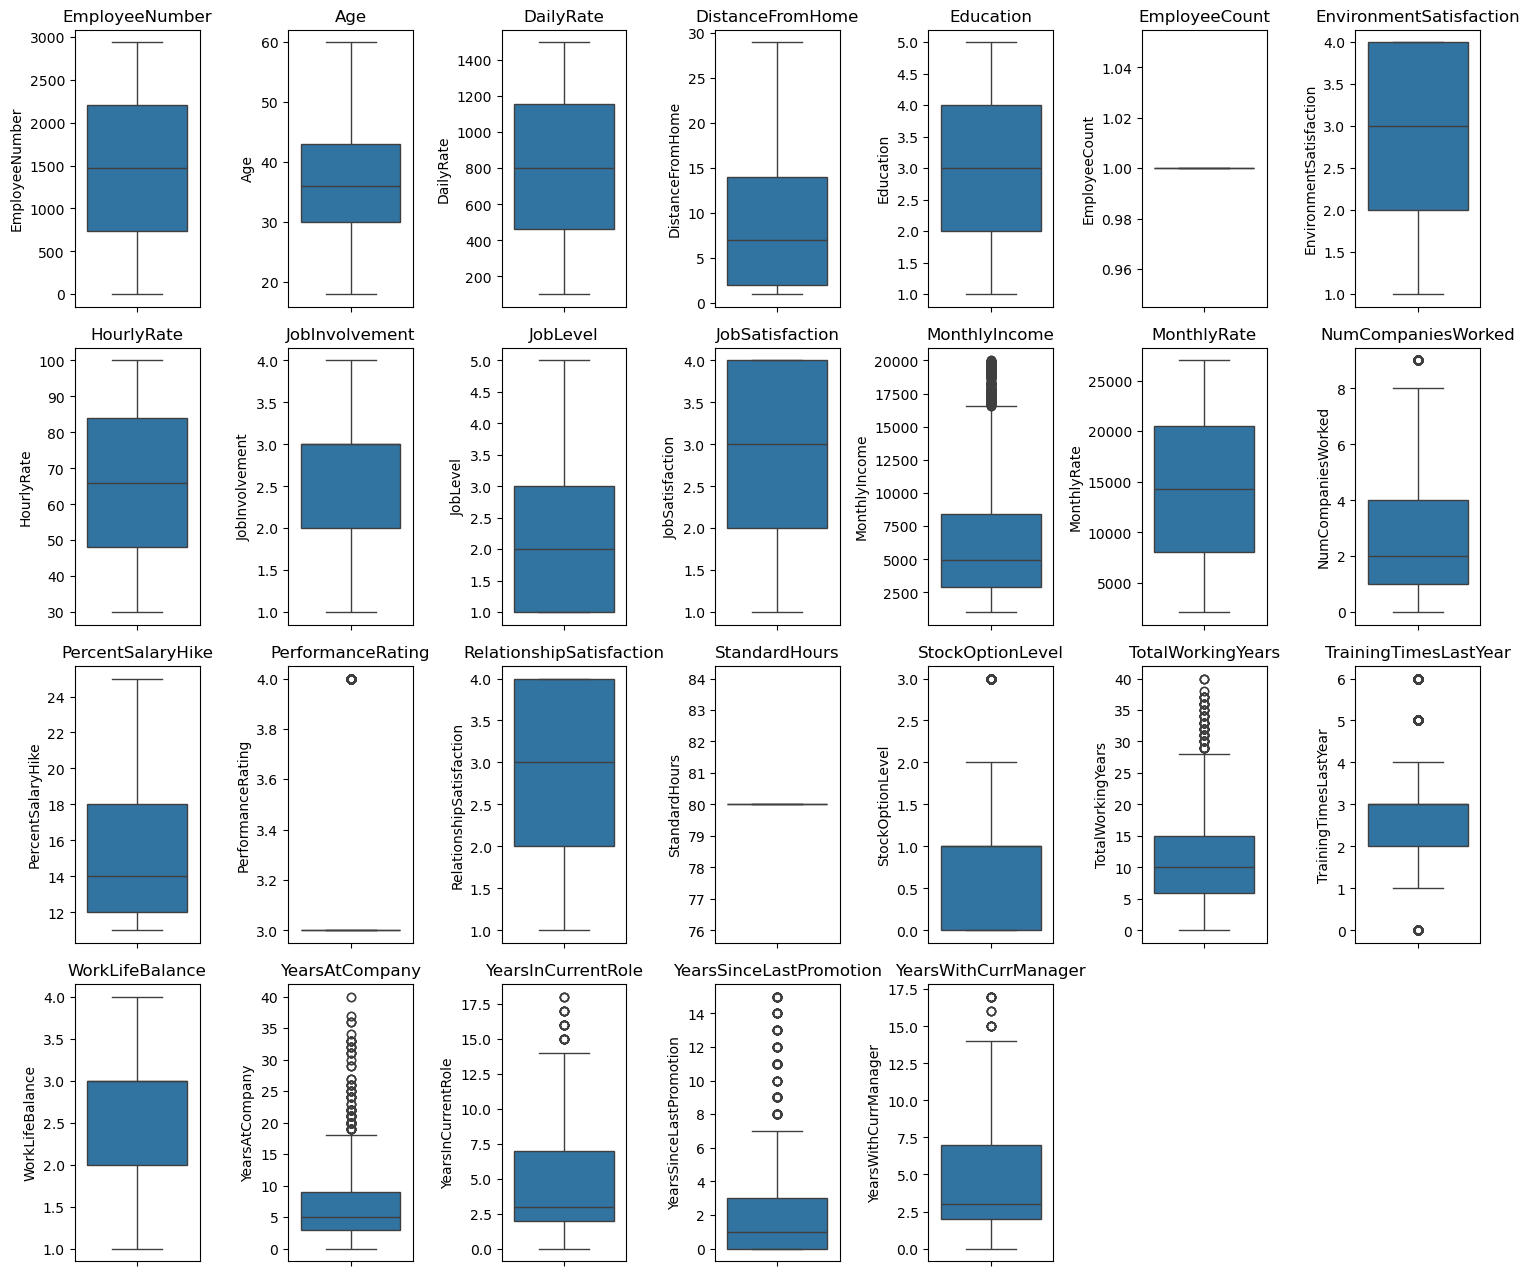

In [7]:
df_num = df.select_dtypes(include=np.number)
num_columns = len(df_num.columns)
columns_per_row = 7
num_rows = (num_columns + columns_per_row - 1) // columns_per_row  # the number of rows to perfectly fit all columns.
plt.figure(figsize=(15, 16))
plt.subplot(num_rows + 1, columns_per_row, columns_per_row + 1) #+1 for spcaes
plt.title("Box Plot")

for i, column in enumerate(df_num.columns, 1):
    row = (i - 1) // columns_per_row + 1 
    # if i = 8, col per row is 7 then row number = 2, thus second row
    col = (i - 1) % columns_per_row + 1
    plt.subplot(num_rows + 1, columns_per_row, (row - 1) * columns_per_row + col)
    sns.boxplot(y=df_num[column])
    plt.title(f'{column}')
  

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

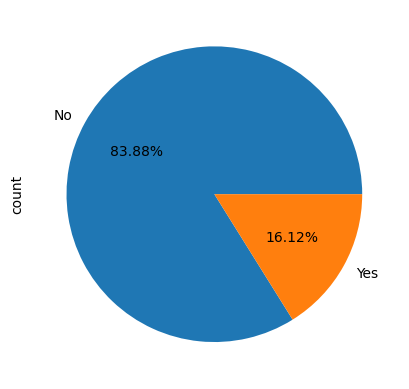

In [8]:
df['Attrition'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')

16.12% Attrition is observed in the company

In [9]:
ages_yes = df[df['Attrition']=='Yes']['Age']
ages_no = df[df['Attrition']=='No']['Age']

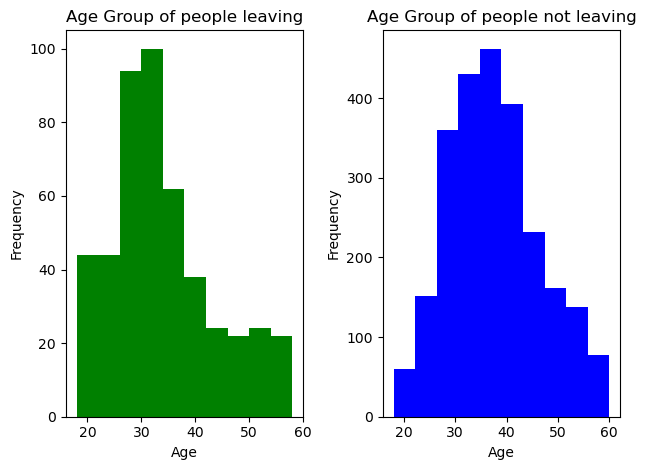

In [10]:
plt.subplot(1, 2, 1) #one row, 2 columns, first position (index)
plt.hist(ages_yes, bins=10, color='green')
plt.title('Age Group of people leaving')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ages_no, bins=10, color='blue')
plt.title('Age Group of people not leaving')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
ages_yes.skew() # Slightly Right Skewed

0.713454203064804

In [12]:
ages_yes.kurt() # Leptokurtosis

-0.06915314431255526

In [13]:
ages_no.skew() # symmetric

0.4078731672354511

In [14]:
ages_no.kurt() # leptokurtosis

-0.41343469059418103

The graph of age group with attrition shows right skewness and leptokurtosy. Thus the peak is observed in age group 25-35 years.

The graph of age group not associated with attrition is symmetrical and shows leptokurtosis. The age group is symmetrically distributed in this and the peak is observed in age group 30-40 years.

In [15]:
table = pd.crosstab(df['BusinessTravel'],df['Attrition'])
table['Percentage'] = (table['Yes'] / 474)* 100 
table

Attrition,No,Yes,Percentage
BusinessTravel,,,
Non-Travel,276,24,5.063291
Travel_Frequently,416,138,29.113924
Travel_Rarely,1774,312,65.822785


Employees who travel rarely are more related to the attrition in the company i.e. 65.82% individuals who left the company were the ones who used to travel rarely.

In [16]:
table_2 = pd.crosstab(df['BusinessTravel'],df['Attrition'])
table_2['Sum'] = table_2.sum(axis = 1)
table_2['Percentage in category'] = (table_2['Yes'] / table_2['Sum'])* 100 
table_2

Attrition,No,Yes,Sum,Percentage in category
BusinessTravel,,,,
Non-Travel,276,24,300,8.000000
Travel_Frequently,416,138,554,24.909747
Travel_Rarely,1774,312,2086,14.956855


Category wise, 24.9% out of 554 frequent, travellers, 14.95% out of 1774 rare travellers, 8% out of 300 non tarvellers are associaated with attrition.

<Axes: xlabel='Attrition', ylabel='BusinessTravel'>

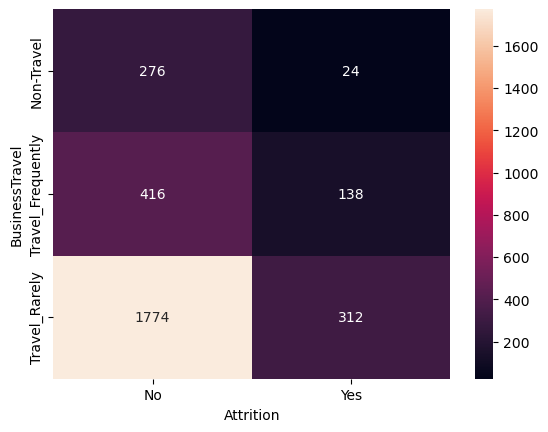

In [17]:
sns.heatmap(pd.crosstab(df['BusinessTravel'],df['Attrition']), annot = True, fmt ='.0f')

In [18]:
table_3 = pd.crosstab(df['Department'], df['Attrition'])
table_3['Sum'] = table_3.sum(axis = 1)
table_3['Percentage in category'] = (table_3['Yes'] / table_3['Sum'])* 100 
table_3['Percentage in total'] = (table_3['Yes'] / 474 )* 100 
table_3

Attrition,No,Yes,Sum,Percentage in category,Percentage in total
Department,,,,,
Human Resources,102,24,126,19.047619,5.063291
Research & Development,1656,266,1922,13.839750,56.118143
Sales,708,184,892,20.627803,38.818565


<Axes: xlabel='Department'>

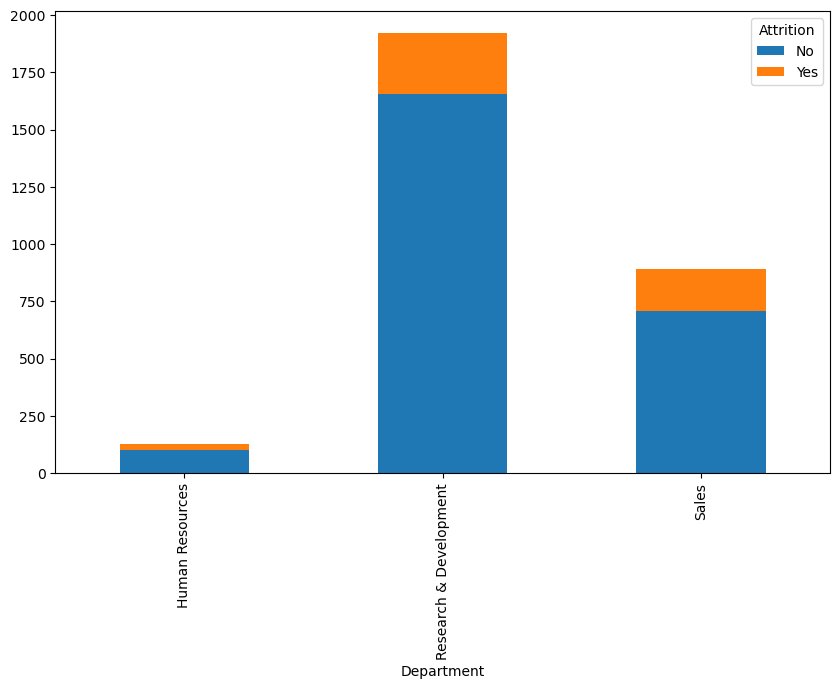

In [19]:
pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar', stacked=True, figsize=(10, 6))

Out of total individuals involved in attrition, 56.11% were associaed with R&D Department. Category wise, more people in Sales are associated with attrition

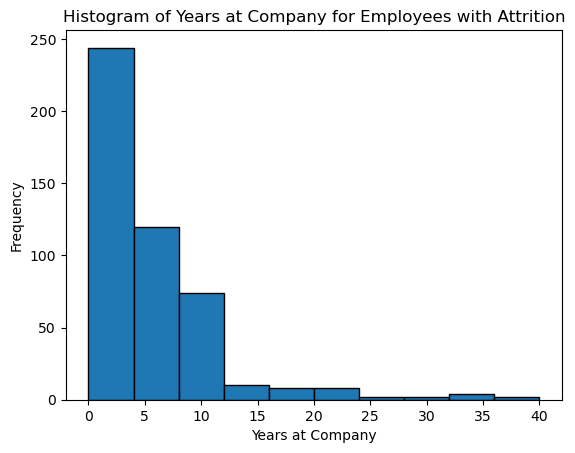

In [20]:
attrition_yes = df[df['Attrition'] == 'Yes']
plt.hist(attrition_yes['YearsAtCompany'], bins=10, edgecolor='black')
plt.title('Histogram of Years at Company for Employees with Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

More number of individuals with less years spent at company have lead to more attrition.

<Axes: xlabel='Attrition', ylabel='Gender'>

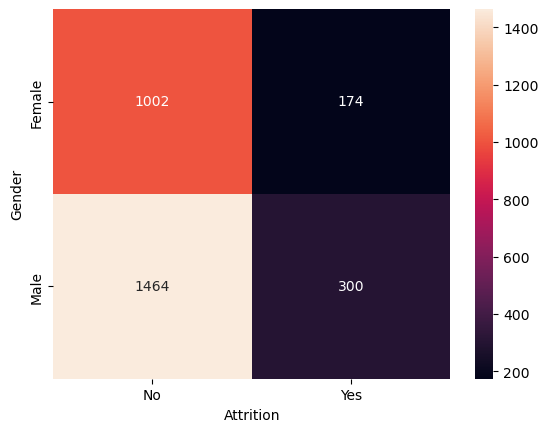

In [21]:
sns.heatmap(pd.crosstab(df['Gender'],df['Attrition']), annot = True, fmt ='.0f')

In [22]:
table_3 = pd.crosstab(df['Gender'],df['Attrition'])
table_3['Total'] = table_3.sum(axis = 1)
table_3['Percentage_Attr in category'] = (table_3['Yes'] / table_3['Total'])* 100 
table_3

Attrition,No,Yes,Total,Percentage_Attr in category
Gender,,,,
Female,1002,174,1176,14.795918
Male,1464,300,1764,17.006803


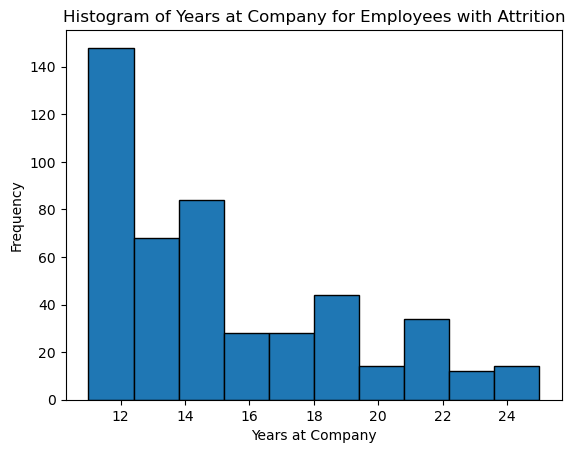

In [23]:
attrition_yes = df[df['Attrition'] == 'Yes']
plt.hist(attrition_yes['PercentSalaryHike'], bins=10, edgecolor='black')
plt.title('Histogram of Years at Company for Employees with Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

Individuals with less percent of salary hike has lead to more attrition

More percentage of Males within their gender category have lead to more attrition in the company.

In [24]:
df.dtypes

EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [25]:
# Encoding

In [26]:
le = LabelEncoder()

In [27]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Department'] = le.fit_transform(df['Department'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [28]:
df

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,41,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,2,0,49,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,3,1,37,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,4,0,33,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,5,0,27,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,0,36,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,0,39,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,0,27,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,0,49,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [29]:
df.describe()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,0.161224,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,0.367800,9.133819,0.665342,403.440447,0.527703,8.105485,1.023991,1.331143,0.0,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,0.000000,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,0.000000,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,0.000000,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,0.000000,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,1.000000,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.drop('EmployeeNumber', axis=1, inplace=True)


In [188]:
df['EmployeeCount'].unique()

KeyError: 'EmployeeCount'

In [32]:
df.drop('EmployeeCount', axis=1, inplace=True)

In [33]:
# Normalisation

In [34]:
scale = MinMaxScaler()

In [35]:
df = scale.fit_transform(df)

In [36]:
df = pd.DataFrame(df)

In [37]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,0.161224,0.450567,0.803741,0.501421,0.630272,0.292590,0.478231,0.449524,0.573923,0.600000,...,0.570748,0.0,0.264626,0.281990,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.367800,0.217472,0.332671,0.288791,0.263851,0.289482,0.255998,0.266229,0.364299,0.489981,...,0.360342,0.0,0.283977,0.194486,0.214842,0.235452,0.153137,0.201251,0.214792,0.209855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.285714,0.500000,0.259843,0.500000,0.035714,0.250000,0.200000,0.333333,0.000000,...,0.333333,0.0,0.000000,0.150000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.000000,0.428571,1.000000,0.501074,0.500000,0.214286,0.500000,0.400000,0.666667,1.000000,...,0.666667,0.0,0.333333,0.250000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.000000,0.595238,1.000000,0.755190,1.000000,0.464286,0.750000,0.600000,1.000000,1.000000,...,1.000000,0.0,0.333333,0.375000,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## LOGISTIC REGRESSION MODEL

In [38]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,1.0,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [39]:
x = df.iloc[:, df.columns != df.columns[0]]


In [40]:
y = df.iloc[:,0]

In [41]:
df.shape

(2940, 33)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)

In [44]:
X_train.shape

(2205, 32)

In [45]:
X_test.shape

(735, 32)

In [46]:
y_train.shape

(2205,)

In [47]:
y_test.shape

(735,)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(X_test)


In [50]:
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test

,actual,Pred
704,0.0,0.0
2482,1.0,0.0
410,0.0,0.0
2608,0.0,0.0
2594,0.0,0.0
...,...,...
906,0.0,0.0
2337,0.0,0.0
2423,1.0,0.0
204,1.0,1.0


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test,y_pred)

In [53]:
cm

array([[601,   9],
       [ 80,  45]], dtype=int64)

In [54]:
(601+45)/(601+9+80+45)

0.8789115646258503

In [55]:
## Accuracy for test data = 87.89%

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_pred)


0.8789115646258503

In [58]:
# It is same.

In [59]:
from sklearn.metrics import classification_report

In [60]:
cm_class_test = classification_report(y_test, y_pred)

In [61]:
print(cm_class_test)

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       610
         1.0       0.83      0.36      0.50       125

    accuracy                           0.88       735
   macro avg       0.86      0.67      0.72       735
weighted avg       0.87      0.88      0.86       735



In [62]:
## train accuracy

In [63]:
y_pred1 = classifier.predict(X_train)

In [64]:
pred_comp_test1=pd.DataFrame({'actual':y_train,'Pred':y_pred1})
pred_comp_test1

,actual,Pred
2802,1.0,1.0
2690,0.0,0.0
1222,1.0,0.0
793,0.0,0.0
2861,0.0,1.0
...,...,...
763,0.0,0.0
835,0.0,0.0
1653,0.0,0.0
2607,0.0,1.0


In [65]:
cm1 = confusion_matrix(y_train,y_pred1)

In [66]:
cm1

array([[1815,   41],
       [ 238,  111]], dtype=int64)

In [67]:
(1815+111)/(1815+41+238+111) 

0.8734693877551021

In [68]:
## Train accuracy is 87.34% which is similar to test accuracy. Hence, the model is Right Fitted.

## SVM MODEL

In [69]:
from sklearn.svm import SVC

In [70]:
train, test = train_test_split(df, test_size = 0.20)

In [71]:
df.shape

(2940, 33)

In [72]:
train.shape

(2352, 33)

In [73]:
test.shape

(588, 33)

In [74]:
train_X = train.iloc[:,1:]

In [75]:
train_Y = train.iloc[:,0]

In [76]:
test_X = test.iloc[:,1:]

In [77]:
test_Y = test.iloc[:,0]

In [78]:
# Linear Kernel

In [79]:
model_linear = SVC(kernel = "linear")

In [80]:
model_linear.fit(train_X, train_Y)

SVC(kernel='linear')

In [81]:
pred_test_linear = model_linear.predict(test_X)

In [82]:
res_linear = np.mean(pred_test_linear == test_Y)

In [83]:
pd.crosstab(pred_test_linear, test_Y)

,0.0,1.0
row_0,,
0.0,493,59
1.0,11,25


In [84]:
res_linear

0.8809523809523809

In [85]:
### rbf kernel

In [86]:
model_rbf = SVC(kernel = "rbf")

In [87]:
model_rbf.fit(train_X, train_Y)

SVC()

In [88]:
pred_test_rbf = model_rbf.predict(test_X)

In [89]:
res_rbf = np.mean(pred_test_rbf == test_Y)

In [90]:
res_rbf

0.9115646258503401

In [91]:
### poly kernel

In [92]:
model_poly = SVC(kernel = "poly")

In [93]:
model_poly.fit(train_X, train_Y)

SVC(kernel='poly')

In [94]:
pred_test_poly = model_poly.predict(test_X)

In [95]:
res_poly = np.mean(pred_test_poly == test_Y)
res_poly

0.9166666666666666

In [96]:
### sigmoid kernel

In [97]:
model_sigm = SVC(kernel = "sigmoid")

In [98]:
model_sigm.fit(train_X, train_Y)

SVC(kernel='sigmoid')

In [99]:
pred_test_sigm= model_sigm.predict(test_X)

In [100]:
res_sigm = np.mean(pred_test_sigm == test_Y)
res_sigm

0.8078231292517006

In [101]:
# poly model is best.

## KNN

In [102]:
X = np.array(df.iloc[:,1:]) # Predictors 
Y = np.array(df.iloc[:,0]) # Target 

In [103]:
X.shape

(2940, 32)

In [104]:
Y.shape

(2940,)

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    Difference=train_acc-test_acc
    acc.append([i,train_acc, test_acc,Difference])



In [108]:
df2=pd.DataFrame(acc)
df2.columns='K','train_acc','test_acc','difference'
df2

,K,train_acc,test_acc,difference
0,3,0.971088,0.833333,0.137755
1,5,0.882653,0.884354,-0.001701
2,7,0.871599,0.857143,0.014456
3,9,0.867772,0.872449,-0.004677
4,11,0.865646,0.870748,-0.005102
5,13,0.860544,0.877551,-0.017007
6,15,0.860119,0.869048,-0.008929
7,17,0.855442,0.867347,-0.011905
8,19,0.854167,0.865646,-0.011480
9,21,0.850340,0.857143,-0.006803


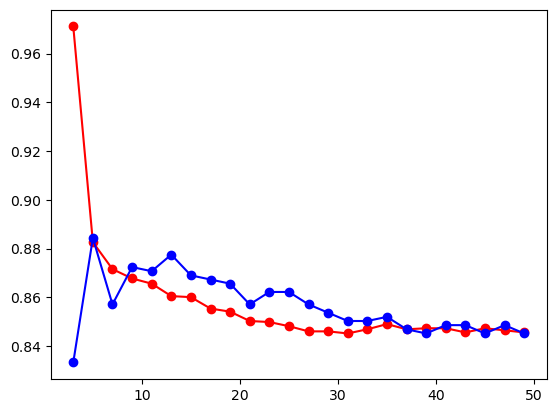

In [109]:
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[2] for i in acc],"bo-")

In [110]:
# k chosen = 23

In [111]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
pred


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

0.8622448979591837


Predictions,0.0,1.0
Actual,,
0.0,494,1
1.0,80,13


In [152]:
(494+13)/(494+1+80+13)

0.8622448979591837

In [114]:
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train, pred_train))
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 


0.8499149659863946


Predictions,0.0,1.0
Actual,,
0.0,1968,3
1.0,350,31


In [153]:
(1968+31)/(1968+31+350+3)

0.8499149659863946

In [116]:
# Right Fitted

## Decision Tree

In [154]:
X = df.iloc[:, df.columns != df.columns[0]]
y = df.iloc[:,0]


In [155]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=0) 
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2940, 32) (2940,) (2205, 32) (2205,) (735, 32) (735,)


In [156]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', max_depth = 4, min_samples_split = 3, min_samples_leaf = 3 )  
print(classifier.fit(X_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=3)


In [157]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [158]:
y_pred= classifier.predict(X_test)  

In [159]:
y_pred1 = classifier.predict(X_train)  


In [160]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[597,  13],
       [ 83,  42]], dtype=int64)

In [161]:
(594 + 109)/(594+16+16+109)

0.9564625850340136

In [162]:
# Test Accuracy = 95.65%

In [163]:
cm1= confusion_matrix(y_train, y_pred1) 
cm1

array([[1815,   41],
       [ 251,   98]], dtype=int64)

In [164]:
(1856+349)/(1856+349+0+0)

1.0

In [165]:
# Training Accuracy = 100%

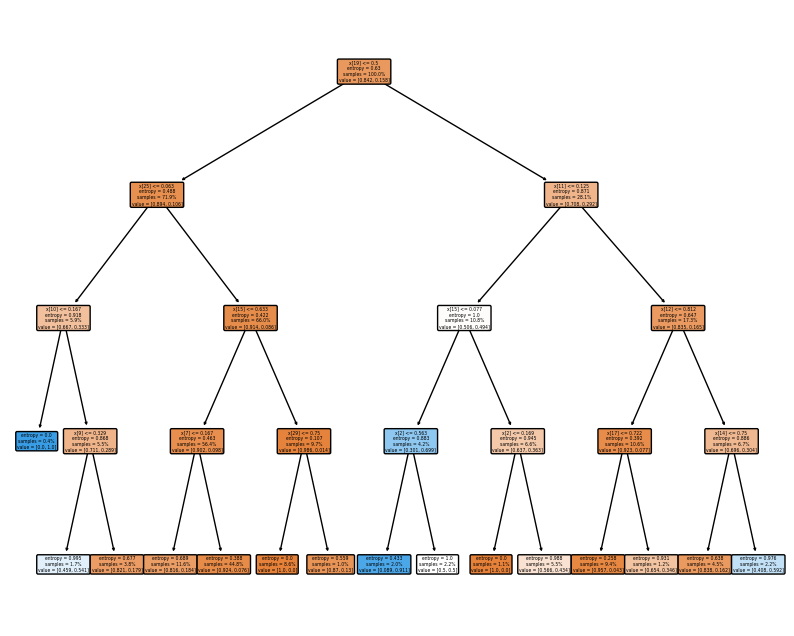

In [166]:
from sklearn import tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
tree.plot_tree(classifier,rounded=True,filled=True,proportion=True)
plt.show()

In [167]:
# Post Pruning

In [168]:
path=classifier.cost_complexity_pruning_path(X_train,y_train)

In [169]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [170]:
print("ccp alpha: ",ccp_alphas)

ccp alpha:  [0.         0.00448899 0.00512985 0.00610494 0.00627218 0.00662502
 0.00762187 0.00794143 0.00857056 0.00915073 0.01084025 0.01789031
 0.02479917 0.03462746]


In [171]:
print("Impurities:",impurities)

Impurities: [0.47248614 0.47697513 0.48210498 0.48820991 0.49448209 0.50110711
 0.51635086 0.52429229 0.53286284 0.54201357 0.55285382 0.57074413
 0.59554329 0.63017075]


In [172]:
clfs=[]  
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)


In [173]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
train_scores

[1.0,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8566893424036282,
 0.8417233560090703,
 0.8417233560090703,
 0.8417233560090703]

In [174]:
test_scores = [clf.score(X_test, y_test) for clf in clfs]
test_scores

[0.9591836734693877,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8585034013605443,
 0.8299319727891157,
 0.8299319727891157,
 0.8299319727891157]

In [175]:
acc_df =pd.DataFrame({'ccp_alpha':ccp_alphas,'impurities':impurities,'Train_ACC':train_scores,'Test_ACC':test_scores})
acc_df['Difference']=acc_df['Train_ACC']-acc_df['Test_ACC']

In [176]:
acc_df

,ccp_alpha,impurities,Train_ACC,Test_ACC,Difference
0,0.000000,0.472486,1.000000,0.959184,0.040816
1,0.004489,0.476975,0.856689,0.858503,-0.001814
2,0.005130,0.482105,0.856689,0.858503,-0.001814
3,0.006105,0.488210,0.856689,0.858503,-0.001814
4,0.006272,0.494482,0.856689,0.858503,-0.001814
5,0.006625,0.501107,0.856689,0.858503,-0.001814
6,0.007622,0.516351,0.856689,0.858503,-0.001814
7,0.007941,0.524292,0.856689,0.858503,-0.001814
8,0.008571,0.532863,0.856689,0.858503,-0.001814
9,0.009151,0.542014,0.856689,0.858503,-0.001814


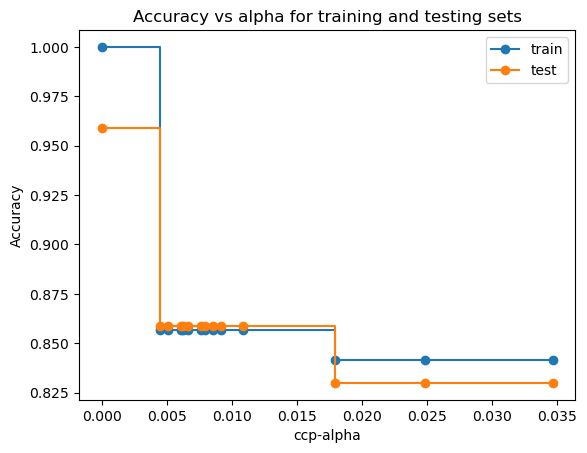

In [177]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp-alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [178]:
# taking ccp_alpha = 0.006625

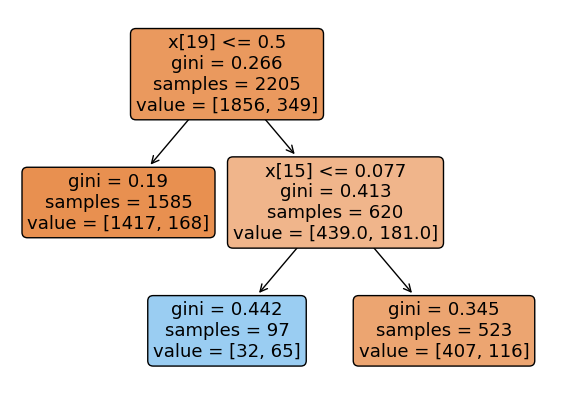

In [179]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.007941)
clf.fit(X_train,y_train)
plt.figure(figsize=(7,5))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [180]:
y_pred= clf.predict(X_test)  

In [181]:
y_pred1 = clf.predict(X_train)

In [182]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[600,  10],
       [ 94,  31]], dtype=int64)

In [183]:
(600+31)/(100+94+31+10) #Test Accuracy

2.6851063829787236

In [184]:
cm1= confusion_matrix(y_train, y_pred1) 
cm1

array([[1824,   32],
       [ 284,   65]], dtype=int64)

In [185]:
(1824+65)/(1824+32+284+65) #Train Accuracy

0.8566893424036282

#### BEST MODEL FOR DEPLOYMENT

POLY_MODEL WITH 91 PERCENYT ACCURACY 